<a href="https://colab.research.google.com/github/yuwei-jpg/CourseSera_Practice/blob/main/ai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS4618_Assignment1_Predict Online Shopping Purchasing

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from seaborn import lmplot, stripplot,boxplot
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# read the dataset_shopping.csv.
df = pd.read_csv( "../dataset_shopping.csv")

# show the dimension of file.
df.shape

(12330, 18)

In [85]:
# show the different features.
df.columns

Index(['admin_num_pages', 'admin_duration', 'info_num_pages', 'info_duration',
       'prod_num_pages', 'prod_duration', 'bounce_rate', 'exit_rate',
       'page_value', 'special_day', 'month', 'operating_system', 'browser',
       'region', 'referrer', 'visitor', 'weekend', 'purchase'],
      dtype='object')

In [86]:
# show the datatypes.
df.dtypes

,0
admin_num_pages,int64
admin_duration,float64
info_num_pages,int64
info_duration,float64
prod_num_pages,int64
prod_duration,float64
bounce_rate,float64
exit_rate,float64
page_value,float64
special_day,float64


In [87]:
# The columns and datatypes (again) but also whether there are any nulls in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin_num_pages   12330 non-null  int64  
 1   admin_duration    12330 non-null  float64
 2   info_num_pages    12330 non-null  int64  
 3   info_duration     12330 non-null  float64
 4   prod_num_pages    12330 non-null  int64  
 5   prod_duration     12330 non-null  float64
 6   bounce_rate       12330 non-null  float64
 7   exit_rate         12330 non-null  float64
 8   page_value        12330 non-null  float64
 9   special_day       12330 non-null  float64
 10  month             12330 non-null  object 
 11  operating_system  12330 non-null  int64  
 12  browser           12330 non-null  int64  
 13  region            12330 non-null  int64  
 14  referrer          12330 non-null  int64  
 15  visitor           12330 non-null  object 
 16  weekend           12330 non-null  bool  

In [ ]:
# summary statistics
df.describe(include="all")

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


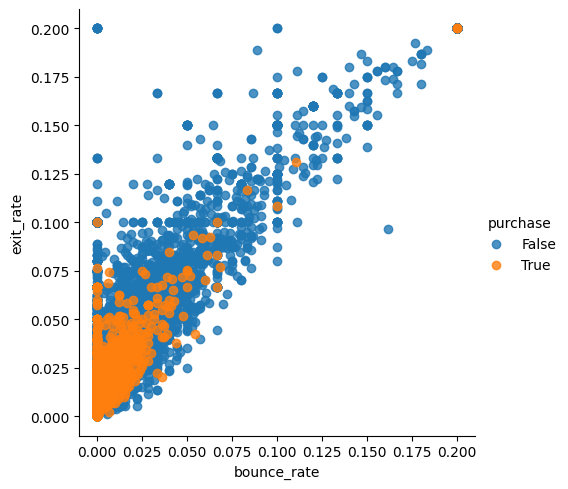

In [88]:
# The lower exit rate and bounce_rate, the more possible that the customer pruchases
plot = sns.lmplot(x="bounce_rate", y="exit_rate", hue="purchase", data=df, fit_reg=False)

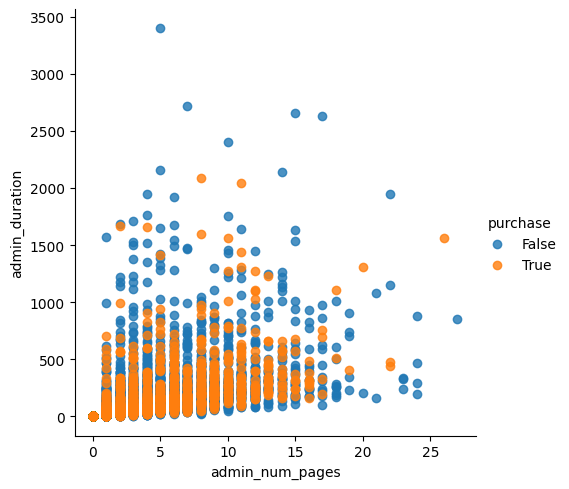

In [89]:
plot1 = sns.lmplot(x="admin_num_pages", y="admin_duration", hue="purchase", data=df, fit_reg=False)

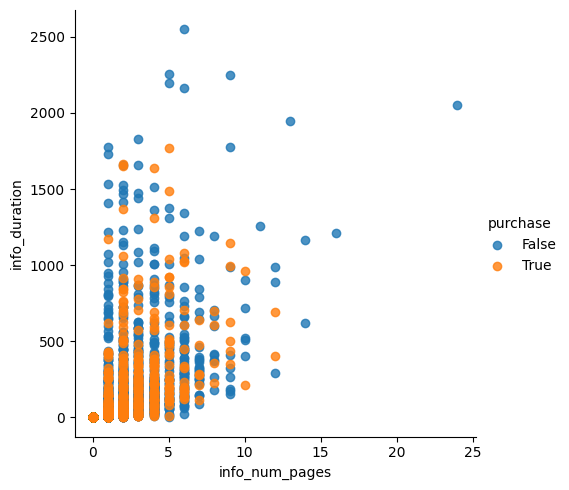

In [90]:
plot2 = sns.lmplot(x="info_num_pages", y="info_duration", hue="purchase", data=df, fit_reg=False)

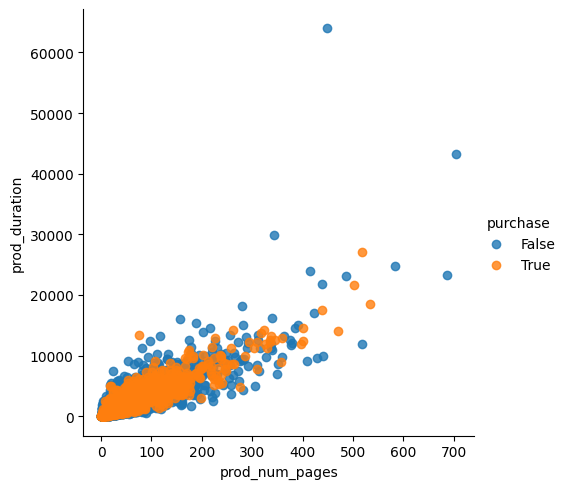

In [91]:
plot3 = sns.lmplot(x="prod_num_pages", y="prod_duration", hue="purchase", data=df, fit_reg=False)

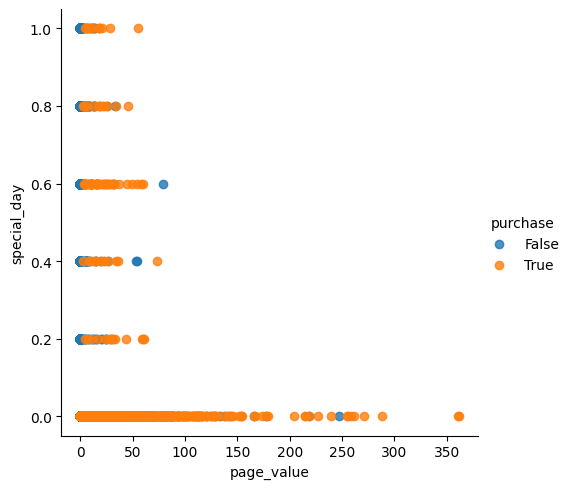

In [92]:
# It shows that customer seems to purchase mostly during none special day (not closer actually)
plot4 = sns.lmplot(x="page_value",y="special_day" ,hue="purchase", data=df, fit_reg=False)

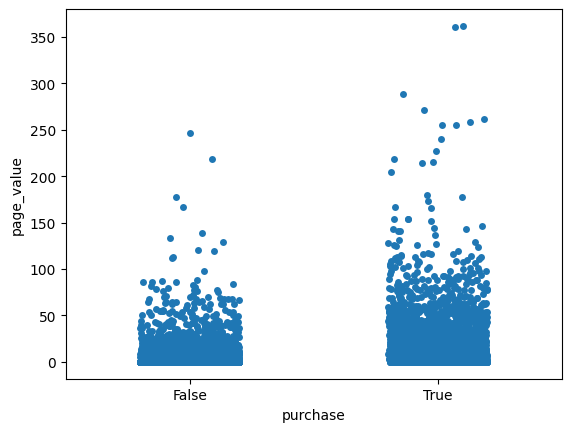

In [93]:
# It shows that there is no obvious relationship between pruchase and page value
plot = stripplot(x="purchase", y="page_value", data=df, jitter=0.2)

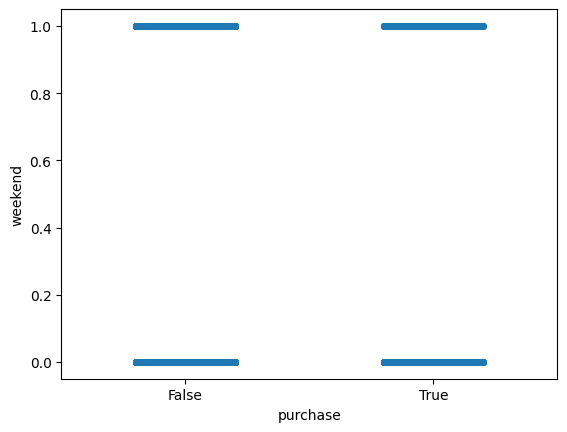

In [94]:
plot = stripplot(x="purchase", y="weekend", data=df, jitter=0.2)

### Using instance-based learning for classification

In [95]:
# The features (I deleted some of the features
# including month, page_value,visitor,weekend,operating system, browser, region, reffer)

features = ["admin_num_pages", "admin_duration","info_num_pages","info_duration","prod_num_pages","prod_duration",
            "bounce_rate","exit_rate","special_day"]

# Extract these features and convert to numpy 2D array
X = df[features].values

# Standardization of X
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["purchase"])

In [96]:
# an odd k in kNN classification helps ensure a clear decision by reducing the possibility of ties in the majority voting process
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_scaled, y)

KNeighborsClassifier()

In [97]:
# wrap each value within a list to make them a sequence
customer_df = pd.DataFrame({"admin_num_pages":[5], "admin_duration":[10],"info_num_pages":[10],"info_duration":[2],"prod_num_pages":[3],"prod_duration":[1],
            "bounce_rate":[0.2],"exit_rate":[0.2],"special_day":[0]})

customer = customer_df.values

predict = knn.predict(customer)

label = label_encoder.inverse_transform(predict)

print("The rabel is",label[0])

The rabel is True


### Data Cleaning


In [124]:
# read the dataset_shopping.csv.
df = pd.read_csv( "../dataset_shopping.csv")

features0=["admin_num_pages", "admin_duration","info_num_pages","info_duration","prod_num_pages","prod_duration",
            "bounce_rate","exit_rate","special_day","month","page_value","visitor","weekend","operating system", "browser", "region", "reffer"]


numeric_features = ["admin_num_pages", "admin_duration", "info_num_pages", "info_duration",
                    "prod_num_pages", "prod_duration", "bounce_rate", "exit_rate",
                    "special_day", "page_value","operating_system", "browser", "region", "referrer"]

nominal_features = ["month","visitor"]

df["weekend"] = df["weekend"].astype(int)

# # using one-hot encoding
# df = pd.get_dummies(df, columns=["operating_system", "browser", "region", "referrer"], drop_first=True)

# scaler = StandardScaler()
# df[numeric_features] = scaler.fit_transform(df[numeric_features])


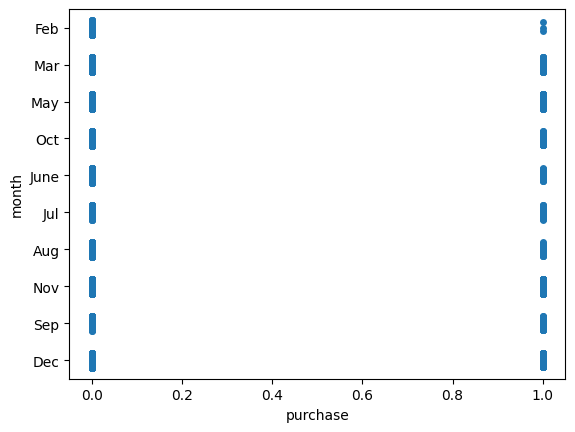

In [125]:
plot = stripplot(x="purchase", y="month", data=df, jitter=0.2)

In [127]:
# filter the noise data
df = df[(df["admin_num_pages"] < 25) &
        (df["admin_duration"] < 2500) &
        (df["info_num_pages"] <= 15) &
        (df["info_duration"] <=2000) &
        (df["prod_num_pages"] < 600) &
        (df["prod_duration"] < 40000) &
        (df["page_value"] <= 300)].copy()


# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the invalid data was filtered out
df.shape

(12316, 18)

### Dataset Exploration

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,special_day,page_value
admin_num_pages,1.000000,0.611298,0.367882,0.252065,0.431703,0.387166,-0.226606,-0.317307,-0.097728,0.097920
admin_duration,0.611298,1.000000,0.271960,0.185788,0.253798,0.285479,-0.150457,-0.212651,-0.077581,0.071936
info_num_pages,0.367882,0.271960,1.000000,0.610464,0.345762,0.357739,-0.118201,-0.163849,-0.050730,0.052491
info_duration,0.252065,0.185788,0.610464,1.000000,0.260304,0.291875,-0.075499,-0.106827,-0.032659,0.038723
prod_num_pages,0.431703,0.253798,0.345762,0.260304,1.000000,0.874272,-0.210300,-0.297709,-0.026698,0.059981
prod_duration,0.387166,0.285479,0.357739,0.291875,0.874272,1.000000,-0.200615,-0.272370,-0.038568,0.059059
bounce_rate,-0.226606,-0.150457,-0.118201,-0.075499,-0.210300,-0.200615,1.000000,0.916723,0.081914,-0.123677
exit_rate,-0.317307,-0.212651,-0.163849,-0.106827,-0.297709,-0.272370,0.916723,1.000000,0.113976,-0.179063
special_day,-0.097728,-0.077581,-0.050730,-0.032659,-0.026698,-0.038568,0.081914,0.113976,1.000000,-0.065785
page_value,0.097920,0.071936,0.052491,0.038723,0.059981,0.059059,-0.123677,-0.179063,-0.065785,1.000000


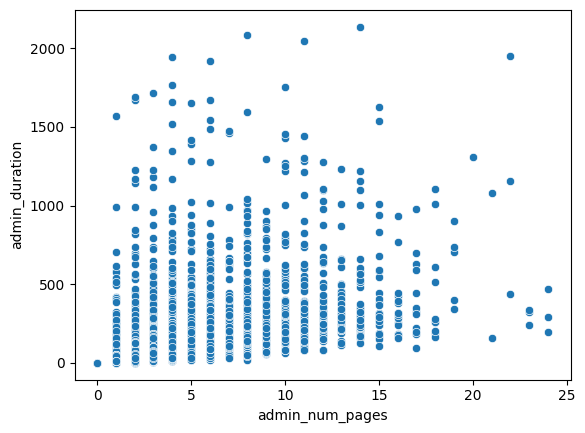

In [130]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

copy_df = dev_df.copy()

plot = sns.scatterplot(x="admin_num_pages", y="admin_duration", data=copy_df)

# from this chart we can see that the admin_num_pages and admin_duration have higher correlation rate.
# same as info_num_pages and info_duration
# same as prod_num_pages and prod_duration
# same as bounce_rate amd exit rate
copy_df[numeric_features].corr()


In [ ]:
# just in case that the admin_num_pages is 0 replace the 0 with 1 and calculate the average time per page
df['avg_duration_per_page'] = df['admin_duration'] / df['admin_num_pages'].replace(0, 1)

df['avg_duration_per_infoPage'] = df['info_duration'] / df['info_num_pages'].replace(0, 1)

df['avg_duration_per_prodPage'] = df['prod_duration'] / df['prod_num_pages'].replace(0, 1)

# the reason why I use plus instead of multiplication is that the combination of multiplication features might be overfitting or adds too much complexity
df['combined_rate'] = df['bounce_rate'] + df['exit_rate']

### Data preprocessing in scikit-learn


In [ ]:
class InsertAPP(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.insert:
            X['avg_duration_per_page'] = X['admin_duration'] / X['admin_num_pages'].replace(0, 1)

            # If the new feature is intended to replace the existing ones,
            # you could drop the existing ones here
            # X.drop(["flarea", "bthrms", "bdrms"], axis=1)

            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X


In [ ]:
class InsertAPIP(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.insert:
            X['avg_duration_per_infoPage'] = X['info_duration'] / X['info_num_pages'].replace(0, 1)
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [ ]:
class InsertAPPP(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.insert:
            X['avg_duration_per_prodPage'] = X['prod_duration'] / X['prod_num_pages'].replace(0, 1)
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [ ]:
# Create the preprocessor
preprocessor = ColumnTransformer([
        ("scaler", StandardScaler(),
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]),
                nominal_features)],
        remainder="drop")